In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from MinorityGameComplex import GameSimulationImitationTermalGraphs

In [3]:
S=2
N=381
Ncop=1
T=100000
numponderas = 100
imprimecada = 10
emes = np.array([5,7,10])

net=0 #RANDOM NETWORK
grado=10
p=None

lendyn = 11
leneme = 3
sigma = np.zeros((lendyn, leneme))
gains = np.zeros((lendyn, leneme))
gains_imitators = np.zeros((lendyn, leneme))

#dynamic_times = np.logspace(0,4.3,lendyn).astype(int)
dynamic_times = np.logspace(0,4.3,lendyn).astype(int)

for m in range(len(emes)):
    M = emes[m]
    for dynt in range(len(dynamic_times)):
        dynT = dynamic_times[dynt]
        print(' ..............................')
        print('              M = {}     ({} / {})'.format(M, m+1, leneme))
        print('   Dynamic time = {}     ({} / {})'.format(dynT, dynt+1, lendyn))
        print(' ..............................')
        s = 0
        g = 0
        gc = 0
        for pond in range(numponderas):
            A, G, GC = GameSimulationImitationTermalGraphs(S, M, N, Ncop, T, dynT, net, grado, p)
            s += np.var(A[(T-10000):T]) / N
            g += np.mean(G[T-10000:T])
            gc += np.mean(GC[T-10000:T])
            if (pond + 1) % imprimecada == 0:
                print('        -Ponderacion nº {}/{}'.format(pond + 1, numponderas))
                print('             σ²/N = {}'.format(s / (pond + 1)))
                print('             <g>  = {}'.format(g / (pond + 1)))
                print('             <gi> = {}'.format(gc / (pond + 1)))
        sigma[dynt, m] =  s / numponderas
        gains[dynt, m] = g / numponderas
        gains_imitators[dynt, m] = gc / numponderas
        print('Remembering...')
        print('dynt = ', dynamic_times[:(dynt+1)])
        print('σ²/N = ', sigma[:(dynt+1), m])
        print(' <g> = ', gains[:(dynt+1), m])
        print('<gi> = ', gains_imitators[:(dynt+1), m])

 ..............................
              M = 5     (1 / 3)
   Dynamic time = 19952     (1 / 3)
 ..............................
        -Ponderacion nº 5/50
             σ²/N = 3.779061703250324
             <g>  = -3.7819957349999997
             <gi> = -2.60545
        -Ponderacion nº 10/50
             σ²/N = 3.745436607016933
             <g>  = -3.7483356624999997
             <gi> = -2.5858149999999993
        -Ponderacion nº 15/50
             σ²/N = 3.751911965565752
             <g>  = -3.755044888333333
             <gi> = -2.4987433333333327
        -Ponderacion nº 20/50
             σ²/N = 3.734865190948404
             <g>  = -3.737932515
             <gi> = -2.5079359999999995
        -Ponderacion nº 25/50
             σ²/N = 3.741477509239541
             <g>  = -3.7443347360000003
             <gi> = -2.5985871999999994
        -Ponderacion nº 30/50
             σ²/N = 3.7679518626893347
             <g>  = -3.771151036666667
             <gi> = -2.488282666666666
 

        -Ponderacion nº 50/50
             σ²/N = 0.3437337504917307
             <g>  = -0.34369294149999985
             <gi> = -0.36058500000000004
Remembering...
dynt =  [19952 44668]
σ²/N =  [0.29070902 0.34373375]
 <g> =  [-0.29082909 -0.34369294]
<gi> =  [-0.2430398 -0.360585 ]
 ..............................
              M = 7     (2 / 3)
   Dynamic time = 100000     (3 / 3)
 ..............................
        -Ponderacion nº 5/50
             σ²/N = 0.3444925929078803
             <g>  = -0.34428300500000003
             <gi> = -0.42834199999999995
        -Ponderacion nº 10/50
             σ²/N = 0.33194734414625937
             <g>  = -0.3318700025
             <gi> = -0.363027
        -Ponderacion nº 15/50
             σ²/N = 0.3082482662570907
             <g>  = -0.3082569316666667
             <gi> = -0.30489933333333336
        -Ponderacion nº 20/50
             σ²/N = 0.28822059474311723
             <g>  = -0.2882345225
             <gi> = -0.282741
        -Pond

In [4]:
for m in range(leneme):
    file_name = 'imitation_Anyado_Sigma,GainImitator,GainALLvsDYNT_' + str(N) +'N_1Ncop_RANDOM_' +str(
                emes[m]) + 'm_' +  str(T)+'T_'+str(numponderas)+'numponds'
    with open('{}.dat'.format(file_name), 'w') as file:
        for i in range(lendyn):
            file.write('{} {} {} {}\n'.format(dynamic_times[i], sigma[i,m], gains[i,m], gains_imitators[i,m]))

In [6]:
S=2
N=401
Ncop=1
T=20000
numponderas = 100
grado=10

lendyn = 14
leneme = 3

dynTime0 = np.logspace(0,4.3,lendyn).astype(int)
sigma0 = np.zeros((lendyn, leneme))
gains0 = np.zeros((lendyn, leneme))
gains_imitators0 = np.zeros((lendyn, leneme))

for m in range(leneme):
    file_name = 'imitation_Sigma,GainImitator,GainALLvsDYNT_' + str(N) +'N_1Ncop_RANDOM_' +str(
                emes[m]) + 'm_' +  str(T)+'T_'+str(numponderas)+'numponds'
    with open('{}.dat'.format(file_name), 'r') as file:
        i = 0
        for line in file:
            value = line.split()
            value[3].split('\n')
            sigma0[i,m] = float(value[1])
            gains0[i,m] = float(value[2])
            gains_imitators0[i,m] = float(value[3])
            i += 1

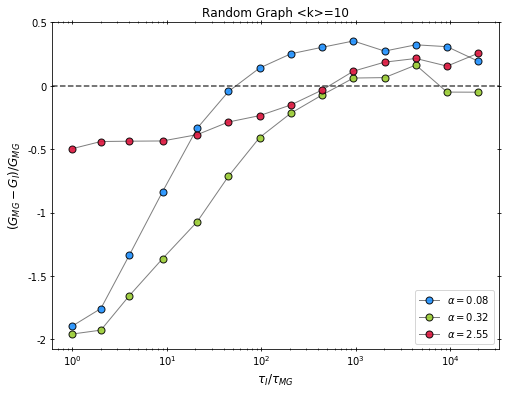

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.set_xscale('log')

#ax.set_ylim([0,4.6])
ax.set_xlabel(r'$\tau_I/\tau_{MG}$', fontsize='large')
ax.set_ylabel(r'$(G_{MG}-G_{I})/G_{MG}$', fontsize='large')
ax.set_title('Random Graph <k>=10')


ax.tick_params(which='both', direction='inout', labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True)


cols = ['dodgerblue', 'yellowgreen', 'crimson', 'yellow', 'orange']
    
lin = ['1','2','3']
mark = ['1','2','3']
for m in range(leneme):
    lin[m], = ax.plot(dynTime0, (gains0[:,m]-gains_imitators0[:,m])/gains0[:,m], 
                      lw=1, ls = '-', color = 'k', alpha=0.5)
    mark[m], = ax.plot(dynTime0, (gains0[:,m]-gains_imitators0[:,m])/gains0[:,m], 
                       ls = '', marker = 'o', mec='k',mfc=cols[m], ms = 7, mew = 1, alpha=0.9)

yticks1 = [-2,-1.5,-1,-0.5,0,0.5]
ax.set_yticks(yticks1)
ax.set_yticklabels([str(i) for i in yticks1])

ax.axhline(y=0, xmin=0, xmax=1, color='k', alpha=0.7, linestyle='--')

labels = [r'$\alpha = 0.08$', r'$\alpha = 0.32$', r'$\alpha = 2.55$']
ax.legend([(lin[0], mark[0]), (lin[1], mark[1]), (lin[2], mark[2])], 
          labels, loc='lower right')

filename = 'imitationRANDOM_RELATIVEGAINvsDYNAMICTIME' + str(
                    N) +' N_' + '1Ncop_' + str(T)+'T_'+str(numponderas)+'numponds.png'
#fig.savefig(filename, bbox_inches='tight')